# Avengers Data Set Cleaning 

In [67]:
#Import necessary liabraries
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
# Read the dataset into pandas
avengers = pd.read_csv("avengers.csv", encoding='latin-1')
avengers.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


We now want to visualize and filter out bad data. Because the data came from a crowdsourced community site, it could contain errors.

The Avengers weren't introduced in the comic series until the 1960's. Lets verify this with thw use of a histogram plot. 

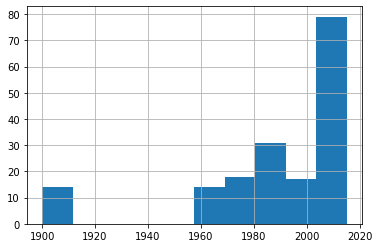

In [90]:
avengers['Year'].hist();

The plot clearly shows faults in our data set by shows avengers back in  **1900**, this is surly an error and should be gotten rid of.

In [70]:
avengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   URL                          173 non-null    object
 1   Name/Alias                   163 non-null    object
 2   Appearances                  173 non-null    int64 
 3   Current?                     173 non-null    object
 4   Gender                       173 non-null    object
 5   Probationary Introl          15 non-null     object
 6   Full/Reserve Avengers Intro  159 non-null    object
 7   Year                         173 non-null    int64 
 8   Years since joining          173 non-null    int64 
 9   Honorary                     173 non-null    object
 10  Death1                       173 non-null    object
 11  Return1                      69 non-null     object
 12  Death2                       17 non-null     object
 13  Return2                      16 non

In [71]:
avengers = avengers[avengers['Year'] >=1960]

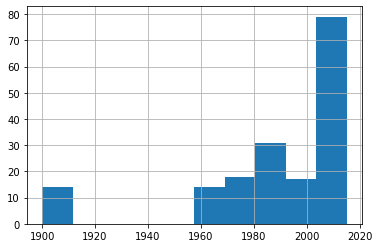

In [92]:
avengers['Year'].hist();

We're interested in the total number of deaths each character experienced, so we'd like to have a single field containing that information. Right now, there are five fields (`Death1` to `Death5`), each of which contains a binary value representing whether a superhero experienced that death or not. For example, a superhero could experience `Death1`, then `Death2`, and so on until the writers decided not to bring the character back to life.

We'd like to combine that information in a single field so we can perform numerical analysis on it more easily.

In [94]:
#Function to go through all row values and check, then sum up `TRUE` values.
def total_deaths(row):
    num_deaths = 0
    columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']
    for column in columns:
        death_value = row[column]
        if pd.isnull(death_value) or death_value == "NO":
            continue
        elif death_value == "YES":
            num_deaths += 1
    return num_deaths

In [95]:
avengers['Deaths'] = avengers.apply(total_deaths,axis = 1) #axis one for moving across columns 

In [98]:
avengers.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes,Deaths
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...,1
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...,1
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm...",1
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ...",1
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...,2


For our final task, we want to verify that the `Years since joining` field accurately reflects the Year column. For example, if an Avenger was introduced in the Year 1960, is the Years since joining value for that Avenger 55?

Since this challenge was created in 2015, use that as the reference year.
 
We want to know for how many rows `Years since joining` was correctly calculated as the `Year` value subtracted from 2015.
 
 
Assign the integer value describing the number of rows with a correct value for `Years since joining` to `joined_accuracy_count`.

In [88]:
joined_accuracy_count  = int()

def years_since_joining(row):
#     columns =['Years since joining','Year']
    year = row['Years since joining']
    years_calculated = 2015  - year
    if years_calculated  == row['Year']:
        return 1
    else:
        return 0
    
avengers["true_count"] = avengers[['Years since joining','Year']].apply(years_since_joining,axis = 1)
        
joined_accuracy_count  = avengers["true_count"].sum()    
joined_accuracy_count

159